# **BBC News Classification**

### **1\. Introduction**

#### **1.1 Objective statement**
Classify the dataset of BBC news articles into five categories (business, entertainment, politics, sport, tech).  
#### **1.2 Plan**:
  * Implement Unsupervised learning on it
  * Then compare it with supervised learning.


### **1.3 Data description**

**File descriptions**

|File name| Descriptions|
|--|--|
|Train.csv|The BBC News Train dataset which has 1490 records|
|Test.csv|The BBC News test dataset which has 736 records|
|Solution.csv |The BBC News Sample， a sample submission file in the correct format|

**Data fields**

|Field name| Descriptions|
|--|--|
|ArticleId|Article id unique # given to the record|
|Article|text of the header and article|
|Category |cateogry of the article (tech, business, sport, entertainment, politics）|




### **2\. Exploratory Data Analysis (EDA)**

* **2.1. Load the Data:**  
  * Load the training dataset using pandas.  
  * Display the first few rows (.head()) of the dataframe.  
  * Use .info() and .describe() to get a summary of the data.  


In [29]:
import pandas as pd

raw_url_train = 'https://raw.githubusercontent.com/RockDeng110/BBC-News-Classification/main/datasets/BBC%20News%20Train.csv'
raw_url_test = 'https://raw.githubusercontent.com/RockDeng110/BBC-News-Classification/main/datasets/BBC%20News%20Test.csv'
raw_url_sample = 'https://raw.githubusercontent.com/RockDeng110/BBC-News-Classification/main/datasets/BBC%20News%20Sample%20Solution.csv'


df_train = pd.read_csv(raw_url_train)
df_test = pd.read_csv(raw_url_test)
df_sample = pd.read_csv(raw_url_sample)


def get_df_summary(df, df_name):
  # print out name of df
  print(f'\n===== Summary of  {df_name}:')
  print(f'[DataFrame head]:')
  print(df.head())
  print(f'[DataFrame info]:')
  df.info()
  print(f'[DataFrame describe]:')
  print(df.describe())

get_df_summary(df_train, "df_train")
get_df_summary(df_test, "df_test")
get_df_summary(df_sample, "df_sample")


===== Summary of  df_train:
[DataFrame head]:
   ArticleId                                               Text  Category
0       1833  worldcom ex-boss launches defence lawyers defe...  business
1        154  german business confidence slides german busin...  business
2       1101  bbc poll indicates economic gloom citizens in ...  business
3       1976  lifestyle  governs mobile choice  faster  bett...      tech
4        917  enron bosses in $168m payout eighteen former e...  business
[DataFrame info]:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.1+ KB
[DataFrame describe]:
         ArticleId
count  1490.000000
mean   1119.696644
std     641.826283
min       2.000000
25%     565.250000
50%

* **2.2. Data Cleaning:**  
  * Check for missing values (.isnull().sum()) and decide on a strategy to handle them if any exist.  
  * Check for duplicate articles and remove them.  


In [30]:
def count_missing_values(df):
  print(f'Number of missing values: {df.isnull().sum()}')

count_missing_values(df_train)
count_missing_values(df_test)
count_missing_values(df_sample)



Number of missing values: ArticleId    0
Text         0
Category     0
dtype: int64
Number of missing values: ArticleId    0
Text         0
dtype: int64
Number of missing values: ArticleId    0
Category     0
dtype: int64


In [31]:
def count_duplicates(df):
  print(f'Number of duplicates: {df.duplicated().sum()}')

count_duplicates(df_train)
count_duplicates(df_test)
count_duplicates(df_sample)

Number of duplicates: 0
Number of duplicates: 0
Number of duplicates: 0


* **2.3. Data Visualization:**  
  * **2.3.1 Category Distribution:** Create a bar chart to visualize the number of articles in each category. Check for class imbalance.  


Number of observations per category:
Category
sport            346
business         336
politics         274
entertainment    273
tech             261
Name: count, dtype: int64


/tmp/ipython-input-821089809.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature_name, palette='viridis')


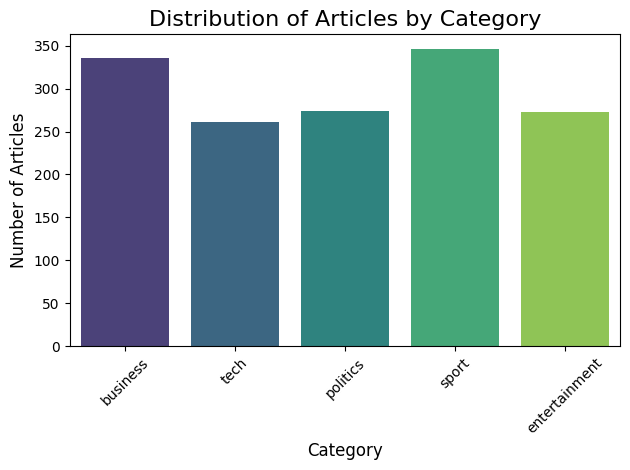

The imbalance ratio is: 1.33:1


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns


def check_category_distribution(df, feature_name):
  # get count numbers of each categories
  category_counts = df_train[feature_name].value_counts()

  # print info
  print("Number of observations per category:")
  print(category_counts)

  # visualize info
  plt.figure()
  sns.countplot(data=df, x=feature_name, palette='viridis')
  plt.title('Distribution of Articles by Category', fontsize=16)
  plt.xlabel(feature_name, fontsize=12)
  plt.ylabel('Number of Articles', fontsize=12)
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

check_category_distribution(df_train, "Category")


# Dataset with ratio under 1.5 is generally considered balence
def get_imbalence_ratio(df, feature_name):
  # get count numbers of each categories
  category_counts = df_train[feature_name].value_counts()
  # 2. Get the majority and minority counts
  majority_count = category_counts.max()
  minority_count = category_counts.min()

  # 3. Calculate the imbalance ratio
  imbalance_ratio = majority_count / minority_count
  print(f"The imbalance ratio is: {imbalance_ratio:.2f}:1")

get_imbalence_ratio(df_train, "Category")


  * **2.3.2 Text Length Analysis:**  
    * Calculate the length of each article (word count and character count).  
    * Plot histograms or boxplots of article lengths for each category to see if there are any noticeable differences.  


   ArticleId                                               Text  Category  \
0       1833  worldcom ex-boss launches defence lawyers defe...  business   
1        154  german business confidence slides german busin...  business   
2       1101  bbc poll indicates economic gloom citizens in ...  business   
3       1976  lifestyle  governs mobile choice  faster  bett...      tech   
4        917  enron bosses in $168m payout eighteen former e...  business   

   TextLength  
0        1866  
1        2016  
2        3104  
3        3618  
4        2190  


/tmp/ipython-input-495536599.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x='Category', y='TextLength', palette='viridis')


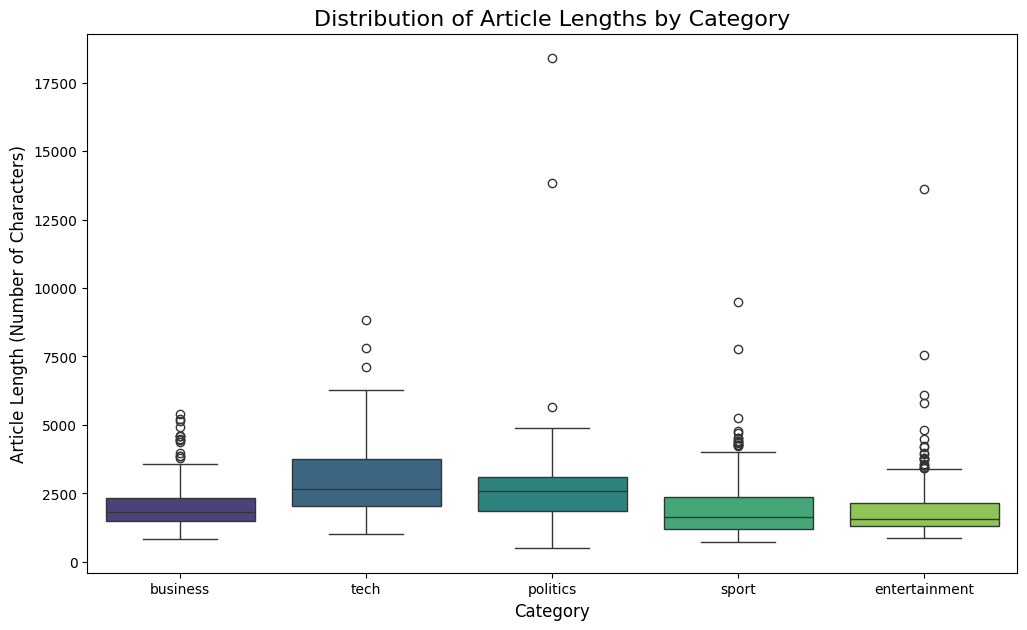

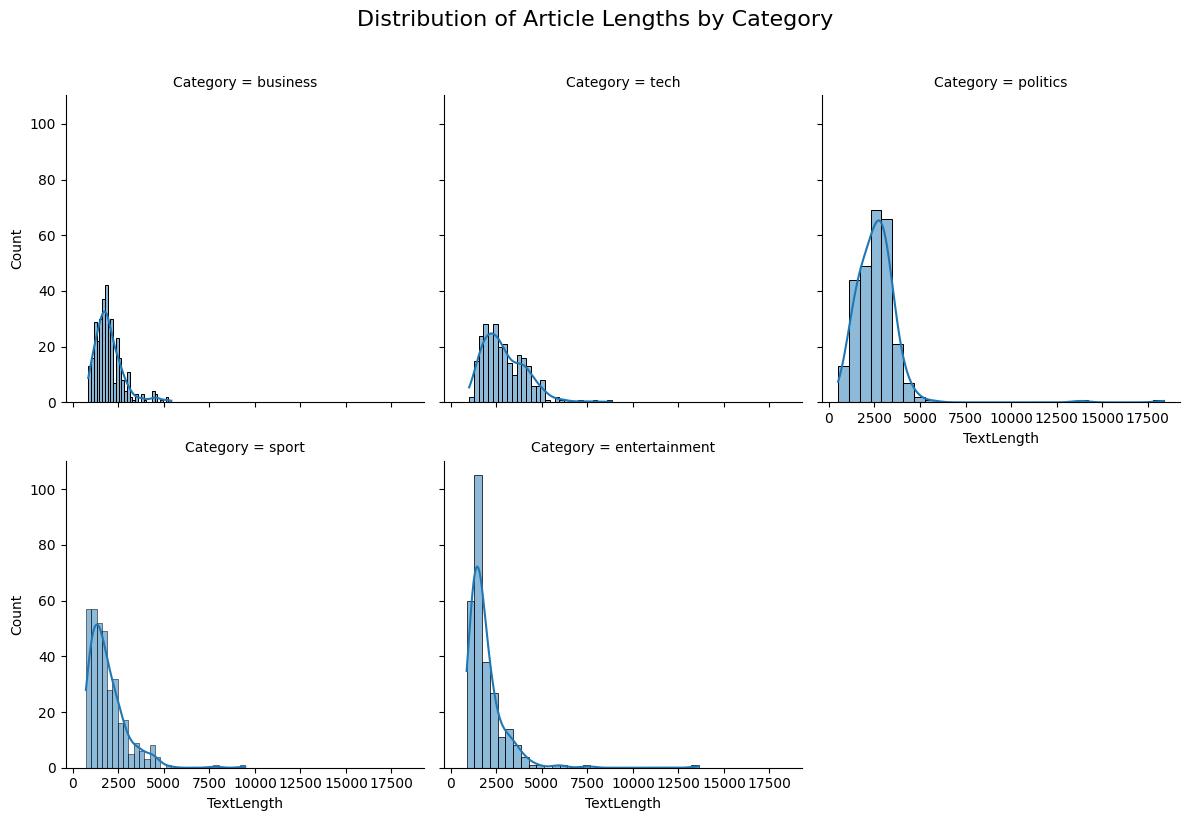

In [33]:
"""
===== Summary of  df_train:
[DataFrame head]:
   ArticleId                                               Text  Category
0       1833  worldcom ex-boss launches defence lawyers defe...  business
1        154  german business confidence slides german busin...  business
2       1101  bbc poll indicates economic gloom citizens in ...  business
3       1976  lifestyle  governs mobile choice  faster  bett...      tech
4        917  enron bosses in $168m payout eighteen former e...  business
"""

# dataset is like above. I need to calculate length of article first,
# then group them in the five categories, which are business, entertainment, politics, sport and tech,
# Plot histograms or boxplots for each one of them.

df_train['TextLength'] = df_train['Text'].str.len()
print(df_train.head())

# Set the figure size for better readability
plt.figure(figsize=(12, 7))

# Create a boxplot to compare article lengths across categories
sns.boxplot(data=df_train, x='Category', y='TextLength', palette='viridis')

# Add a title and labels for clarity
plt.title('Distribution of Article Lengths by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Article Length (Number of Characters)', fontsize=12)

# Show the plot
plt.show()


# Create a FacetGrid to plot a histogram for each category
g = sns.FacetGrid(df_train, col='Category', col_wrap=3, height=4)

# Map a histogram to each subplot in the grid
g.map(sns.histplot, 'TextLength', bins=30, kde=True)

# Add a title for the entire plot
g.fig.suptitle('Distribution of Article Lengths by Category', y=1.02, fontsize=16)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


  * **2.3.3 Word Frequency Analysis:**  
    * Identify the most common words in the entire corpus.  
    * Create word clouds for each category to visualize the most frequent and important words.  
    * Use bar charts to show the frequency of top N words per category after removing stopwords.

In [34]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
import pandas as pd
import re
from nltk.corpus import stopwords

# Assuming your DataFrame is loaded into df_train
# df_train = pd.read_csv(...)

# Get the standard list of English stopwords
stop_words = set(stopwords.words('english'))

def clean_text(text):
    """
    Cleans text by removing punctuation, converting to lowercase,
    and removing stopwords.
    """
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    # Tokenize the text
    words = text.split()
    # Remove stopwords
    cleaned_words = [word for word in words if word not in stop_words]
    return ' '.join(cleaned_words)

# Apply the cleaning function to your 'Text' column
df_train['CleanedText'] = df_train['Text'].apply(clean_text)

In [36]:
# find most common words
from collections import Counter

# Join all the cleaned text into a single string
all_text = ' '.join(df_train['CleanedText'])

# Split the string into a list of words
all_words = all_text.split()

# Count the frequency of each word
word_counts = Counter(all_words)

# Get the 15 most common words
most_common_words = word_counts.most_common(15)

print("Top 15 most common words in the entire corpus:")
for word, frequency in most_common_words:
    print(f"{word}: {frequency}")

Top 15 most common words in the entire corpus:
said: 4839
mr: 1974
would: 1714
year: 1528
also: 1426
new: 1338
people: 1324
us: 1264
one: 1249
could: 1032
first: 934
last: 893
two: 889
time: 882
world: 805


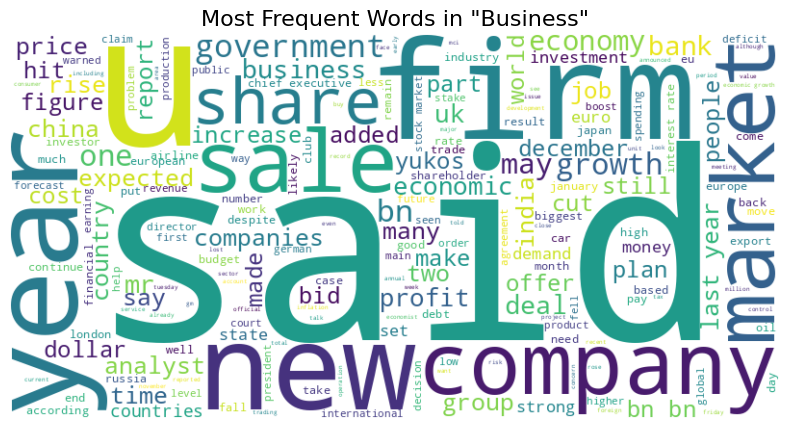

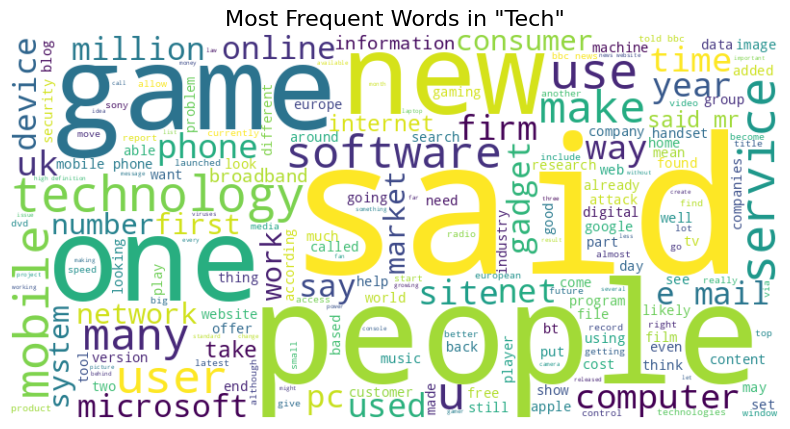

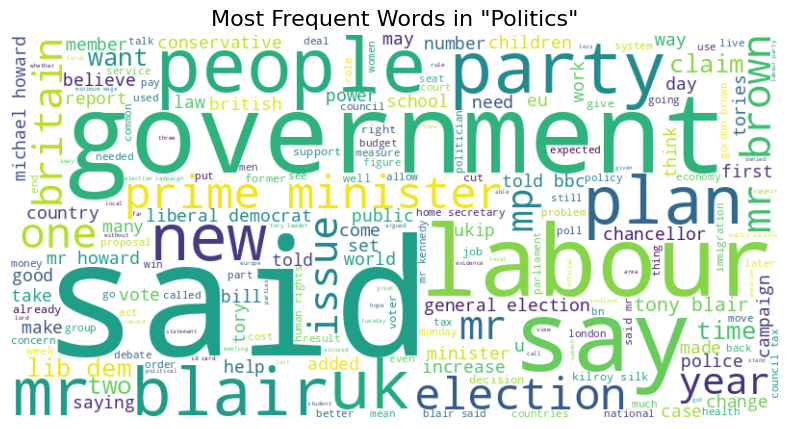

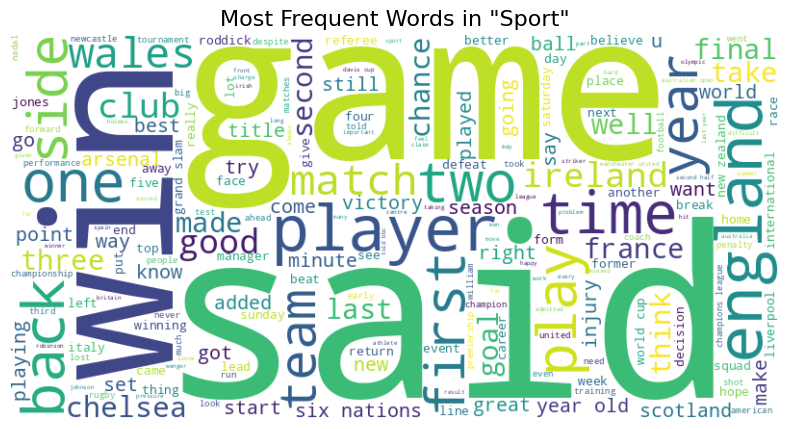

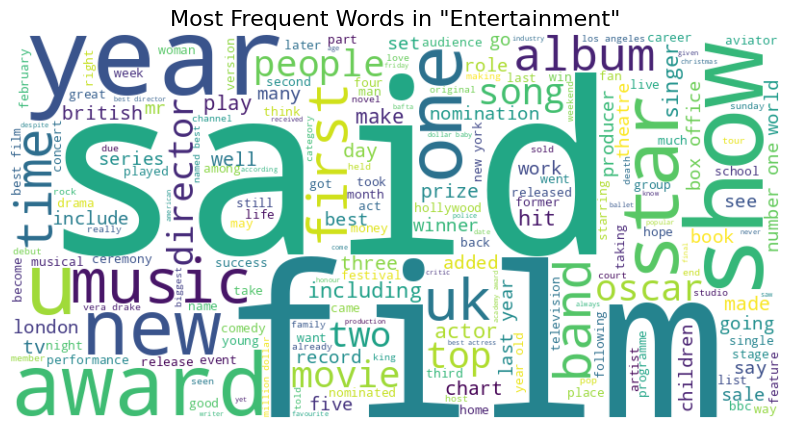

In [37]:
# word cloud for each category
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get the unique categories
categories = df_train['Category'].unique()

for category in categories:
    # Filter the text for the current category
    category_text = ' '.join(df_train[df_train['Category'] == category]['CleanedText'])

    # Create the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(category_text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Most Frequent Words in "{category.capitalize()}"', fontsize=16)
    plt.axis('off')
    plt.show()

/tmp/ipython-input-3860449030.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_words, x='Frequency', y='Word', palette='mako')


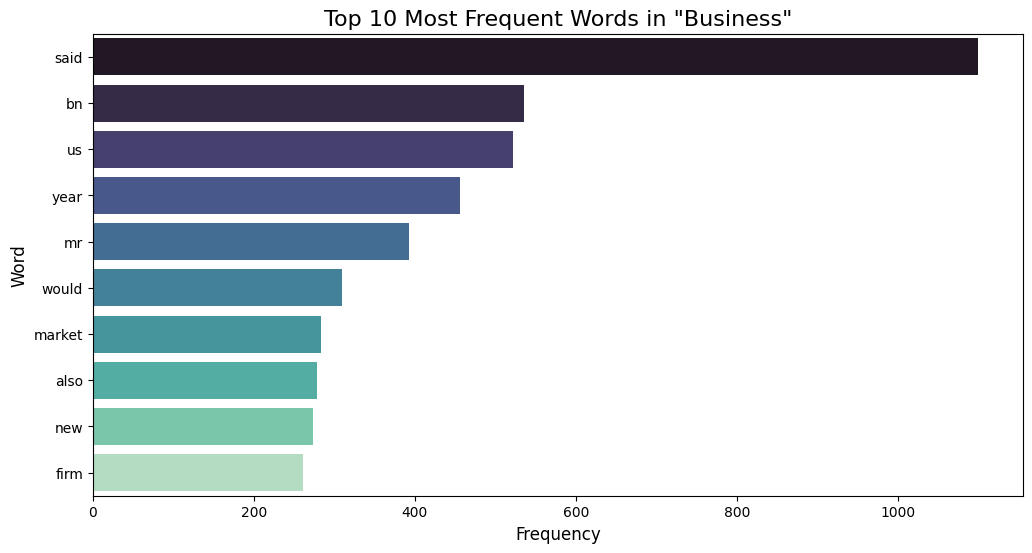

/tmp/ipython-input-3860449030.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_words, x='Frequency', y='Word', palette='mako')


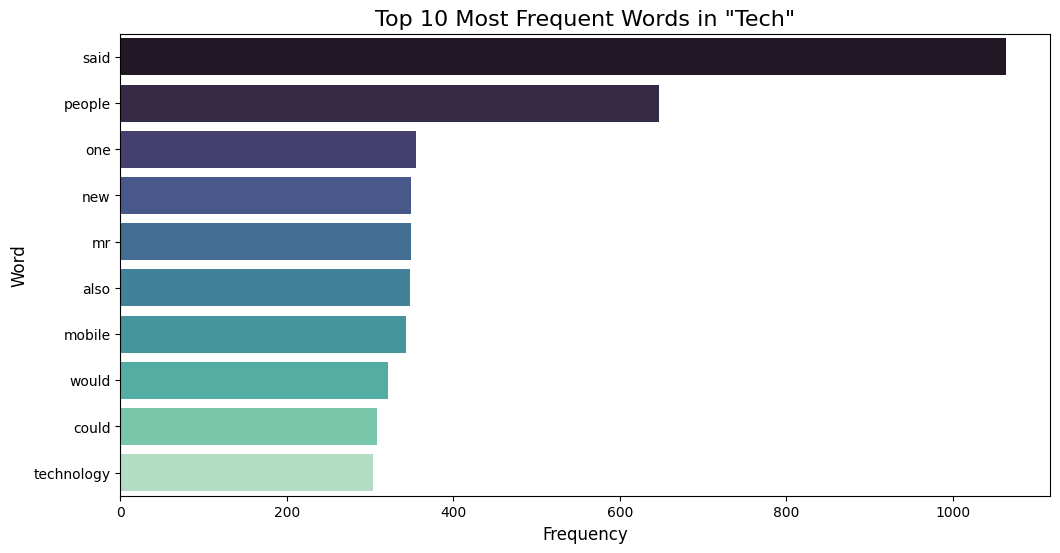

/tmp/ipython-input-3860449030.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_words, x='Frequency', y='Word', palette='mako')


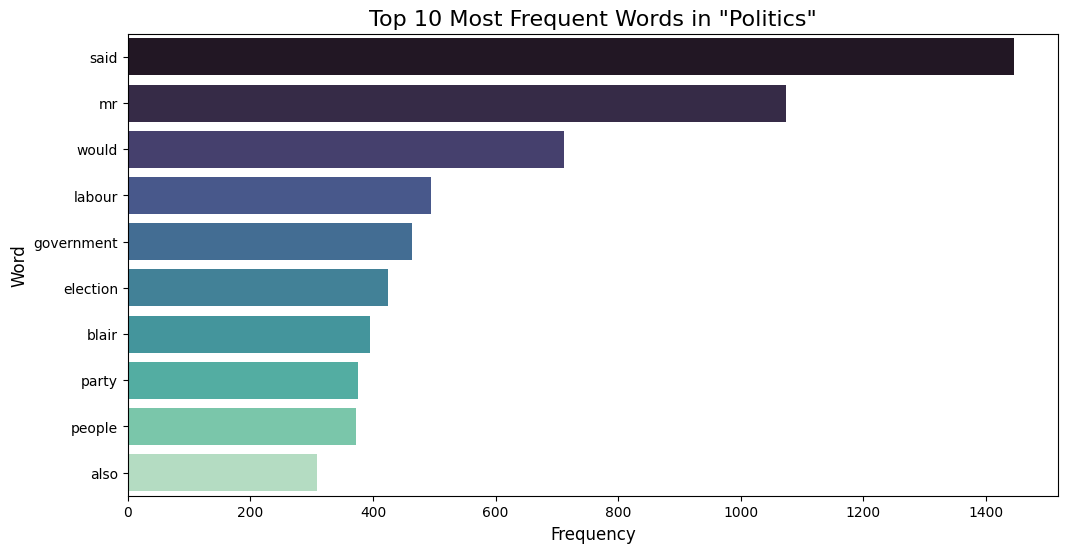

/tmp/ipython-input-3860449030.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_words, x='Frequency', y='Word', palette='mako')


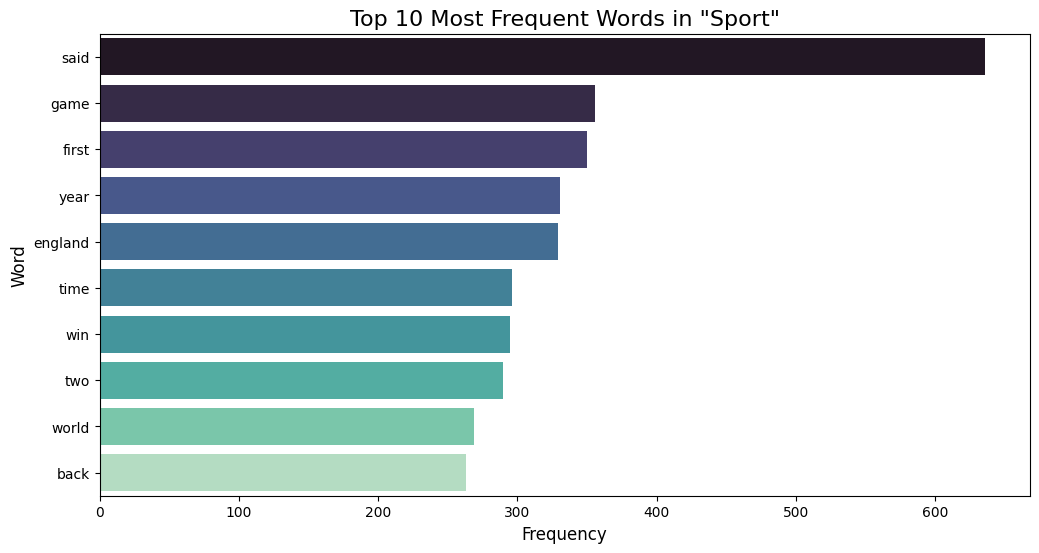

/tmp/ipython-input-3860449030.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_words, x='Frequency', y='Word', palette='mako')


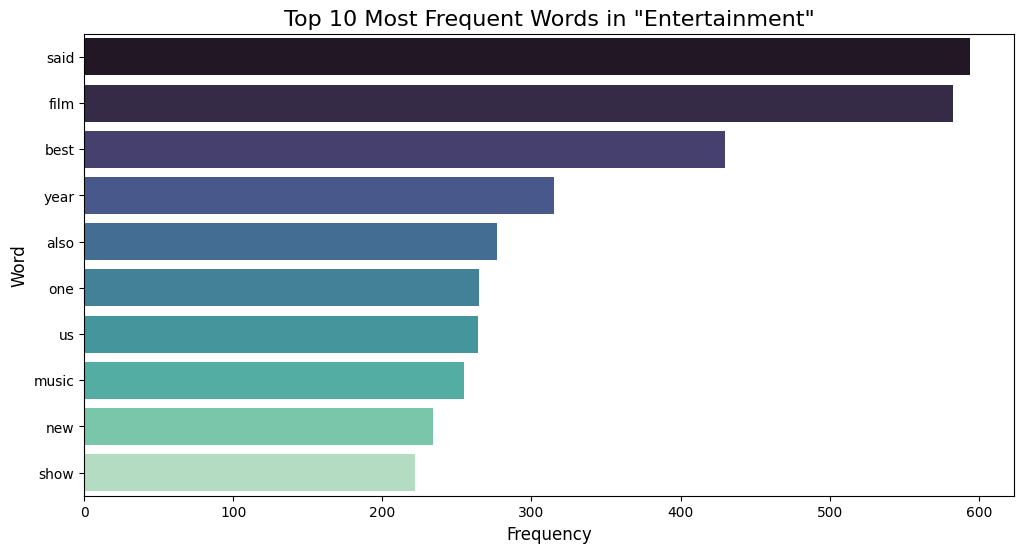

In [38]:
# bar chat
import seaborn as sns
from collections import Counter

# Set N for the top N words
N = 10

for category in categories:
    # Filter text for the current category and create a list of all words
    category_words = ' '.join(df_train[df_train['Category'] == category]['CleanedText']).split()

    # Count the words
    category_word_counts = Counter(category_words)

    # Get the top N most common words and their frequencies
    top_words = category_word_counts.most_common(N)

    # Create a DataFrame for plotting
    df_top_words = pd.DataFrame(top_words, columns=['Word', 'Frequency'])

    # Plot the bar chart
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df_top_words, x='Frequency', y='Word', palette='mako')
    plt.title(f'Top {N} Most Frequent Words in "{category.capitalize()}"', fontsize=16)
    plt.xlabel('Frequency', fontsize=12)
    plt.ylabel('Word', fontsize=12)
    plt.show()



### **3\. Data Preprocessing**

* **3.1. Text Cleaning:**  
  * Convert all text to lowercase.  
  * Remove punctuation and special characters.  
  * Remove numbers (if they are not considered useful features).  
  * Remove common English stopwords.  




In [39]:
import pandas as pd
import re
from nltk.corpus import stopwords

# Assuming your DataFrame is loaded into df_train
# df_train = pd.read_csv(...)

# Get the standard list of English stopwords
stop_words = set(stopwords.words('english'))



def preprocess_text(text):
    """
    Cleans and preprocesses a text string by:
    1. Converting to lowercase
    2. Removing punctuation, special characters, and numbers
    3. Removing stopwords
    """
    # 1. Convert to lowercase
    text = text.lower()

    # 2. Remove punctuation, special characters, and numbers
    # This regex keeps only alphabetic characters and spaces
    text = re.sub(r'[^a-z\s]', '', text)

    # 3. Tokenize the text (split into words)
    words = text.split()

    # 4. Remove common English stopwords
    words = [word for word in words if word not in stop_words]

    # Rejoin the words into a single string
    return ' '.join(words)



  # Apply the preprocessing function to the 'Text' column
df_train['ProcessedText'] = df_train['Text'].apply(preprocess_text)

# Display the original and processed text side-by-side to verify
print("Comparison of Original and Processed Text:")
print(df_train[['Text', 'ProcessedText']].head())

Comparison of Original and Processed Text:
                                                Text  \
0  worldcom ex-boss launches defence lawyers defe...   
1  german business confidence slides german busin...   
2  bbc poll indicates economic gloom citizens in ...   
3  lifestyle  governs mobile choice  faster  bett...   
4  enron bosses in $168m payout eighteen former e...   

                                       ProcessedText  
0  worldcom exboss launches defence lawyers defen...  
1  german business confidence slides german busin...  
2  bbc poll indicates economic gloom citizens maj...  
3  lifestyle governs mobile choice faster better ...  
4  enron bosses payout eighteen former enron dire...  


* **3.2. Text Normalization:**  
  * The primary goal of normalization is to reduce the vocabulary size and group related words together. Without it, a machine learning model would treat "run," "running," and "runs" as three completely separate and unrelated features. It has several benifits:
    * Improves Model Generalization
    * Reduces Dimensionality
    * Increases Feature Importance
  * Common Normalization Techniques
    * **Stemming** is a fast, rule-based process that chops off the ends of words to get to a common base or "stem." It's a crude but often effective method.
    * **Lemmatization** is a more sophisticated process that uses a dictionary and analyzes the part of speech to reduce a word to its true root form, known as its "lemma."
  * As lemmatization is generally preferred for better accuracy, we are gonna apply lemmatization here.


In [40]:
import nltk

nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt') # Tokenizer, if you don't have it


from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):
    """
    Converts Treebank POS tags to WordNet POS tags.
    """
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        # Default to noun if the tag is not recognized
        return wordnet.NOUN



from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

def lemmatize_text(text):
    """
    Performs lemmatization on a text string using POS tags.
    """
    lemmatizer = WordNetLemmatizer()
    # Tokenize the text and get POS tags
    pos_tagged_words = nltk.pos_tag(word_tokenize(text))

    # Lemmatize each word with its corresponding POS tag
    lemmatized_words = [
        lemmatizer.lemmatize(word, pos=get_wordnet_pos(tag))
        for word, tag in pos_tagged_words
    ]

    return ' '.join(lemmatized_words)



import pandas as pd

# Assuming df_train is your DataFrame with the 'ProcessedText' column
# df_train['ProcessedText'] = ...

# Apply the lemmatization function
df_train['LemmatizedText'] = df_train['ProcessedText'].apply(lemmatize_text)

# Display the results to verify
print("Comparison of Processed and Lemmatized Text:")
print(df_train[['ProcessedText', 'LemmatizedText']].head())

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Comparison of Processed and Lemmatized Text:
                                       ProcessedText  \
0  worldcom exboss launches defence lawyers defen...   
1  german business confidence slides german busin...   
2  bbc poll indicates economic gloom citizens maj...   
3  lifestyle governs mobile choice faster better ...   
4  enron bosses payout eighteen former enron dire...   

                                      LemmatizedText  
0  worldcom exboss launch defence lawyer defend f...  
1  german business confidence slides german busin...  
2  bbc poll indicate economic gloom citizen major...  
3  lifestyle governs mobile choice faster well fu...  
4  enron boss payout eighteen former enron direct...  


* **3.3. Feature Engineering (Text Representation):**  
  Machine learning models don't understand words or sentences; they understand numbers. The goal of feature engineering for text is to translate your cleaned text data into a numerical format that captures its meaning and importance.

  TF-IDF (Term Frequency-Inverse Document Frequency) is a numerical statistic that reflects how important a word is to a document in a collection or corpus. It assigns a weight to each word, giving higher scores to words that are more unique and relevant to a specific document.
  * **TF-IDF (Term Frequency-Inverse Document Frequency):**  
    * **TF(Term Frequency)**: This metric measures how often a word appears in a single document.
    * **IDF(Inverse Document Frequency)**:This metric measures how rare a word is across all documents in your collection. It acts as a penalty for common words.
    * **TF-IDF Score = TF * IDF**:A word gets a high TF-IDF score if it appears frequently in a specific document (high TF) but is rare across all other documents (high IDF).

    * Use TfidfVectorizer from scikit-learn to conduct the TF-IDF on dataset.  
    * **TODO**: Discuss key parameters like max_features, ngram_range, and min_df/max_df.  


In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
# We'll limit the number of features to the 5000 most frequent words
tfidf_vectorizer = TfidfVectorizer(max_features=5000)



import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit the vectorizer to the data and transform the text into a matrix
X = tfidf_vectorizer.fit_transform(df_train['LemmatizedText'])


# Check the shape of the resulting sparse matrix
# (Number of documents, Number of features/words)
print("Shape of the TF-IDF matrix:", X.shape)

# You can also see the words that were learned as features
print("\nSome of the learned feature names (vocabulary):")
print(tfidf_vectorizer.get_feature_names_out()[:20])


Shape of the TF-IDF matrix: (1490, 5000)

Some of the learned feature names (vocabulary):
['abandon' 'abbas' 'abc' 'ability' 'able' 'abn' 'abolish' 'abroad' 'absa'
 'absence' 'absolute' 'absolutely' 'abuse' 'abused' 'ac' 'academic'
 'academy' 'accelerate' 'accept' 'acceptable']


* **3.4. Data Splitting:**  
  * Split the data into training and validation sets using train\_test\_split. Ensure a stratified split if there is a class imbalance.

### **4\. Model Building**

* **4.1. Baseline Model:**  
  * Start with a simple, interpretable model like **Naive Bayes** (specifically MultinomialNB) or **Logistic Regression**.  
  * Train the model on the TF-IDF vectors.  
* **4.2. Advanced Models:**  
  * Train a few more powerful models. Good candidates include:  
    * **Support Vector Machines (SVM)**  
    * **Random Forest**  
    * **Gradient Boosting Machines (e.g., XGBoost, LightGBM)**  
* **4.3. (Optional) Deep Learning Models:**  
  * For a more advanced approach, consider a simple neural network:  
    * **Word Embeddings (e.g., GloVe, Word2Vec) or an Embedding Layer.**  
    * **Recurrent Neural Network (RNN) like LSTM or a Convolutional Neural Network (CNN) for text classification.**  
    * This section would require libraries like TensorFlow/Keras or PyTorch.

### **5\. Model Evaluation**

* **5.1. Performance Metrics:**  
  * Define the evaluation metrics to be used. For a classification task, these include:  
    * **Accuracy:** Overall correct predictions.  
    * **Precision, Recall, F1-Score:** Per-class performance.  
    * **Confusion Matrix:** To visualize where the models are making mistakes.  
    * **Classification Report:** A summary of precision, recall, and F1-score for each class.  
* **5.2. Model Comparison:**  
  * Make predictions on the validation set for each trained model.  
  * Generate a classification report and a confusion matrix for each model.  
  * Create a summary table or bar chart to compare the key metrics (e.g., accuracy, F1-score) across all models.  
  * Select the best-performing model based on the evaluation results.

### **6\. Hyperparameter Tuning (for the Best Model)**

* **6.1. Tuning Strategy:**  
  * Choose a hyperparameter tuning technique like **GridSearchCV** or **RandomizedSearchCV** for the best-performing model from the previous step.  
  * Define the parameter grid to search over.  
* **6.2. Final Model Training:**  
  * Train the selected model with the best hyperparameters found during tuning on the **entire training dataset**.


### **8\. Comparison with supervised learning**



## Reference
* https://www.kaggle.com/competitions/learn-ai-bbc/overview

---
---

### **7\. Conclusion & Submission**

* **7.1. Summary of Results:**  
  * Summarize the project findings. State which model performed best and its final score on the validation set.  
  * Discuss any interesting insights from the EDA or model performance.  
* **7.2. (If applicable) Submission:**  
  * Describe the process for generating the submission file if the competition requires predictions on a separate test set.  
  * Load the test data, apply the same preprocessing steps, and use the final trained model to make predictions.  
  * Format the predictions into the required submission file format.  
* **7.3. Future Work:**  
  * Suggest potential improvements, such as:  
    * Trying more advanced deep learning architectures (e.g., Transformers like BERT).  
    * Experimenting with different feature engineering techniques.  
    * Using different word embeddings.  
    * Ensemble methods.